<u>Review the list below to find out more about this datasets columns:</u>

1. artist_name: The name of the artist

2. track_name: The name of the song

3. release_date: When this song was released

4. genre: The categorical genre of this song

5. lyrics: The pre-tokenized lyrics of this song. Disclaimer: note that as this is real-world data, lyrical content is often obscene. 

6. len:  The number of words in the lyrics of this song

7. dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

8. violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

9. world/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.

10. night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

11. shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

12. family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

13. romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

14. communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

15. obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

16. music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

17. movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

18. light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

19. family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

20. sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

21. feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

22. topic: The categorical label of lyrical content

23. age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.



In [1]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv file
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/raw/train.csv')

# print out the first 5 rows of data
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [3]:
#Dropped Unnamed:0 (not in original list of variables)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [4]:
# Print out general information on this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28362 non-null  object 
 1   track_name                28362 non-null  object 
 2   release_date              28362 non-null  int64  
 3   genre                     28362 non-null  object 
 4   lyrics                    28362 non-null  object 
 5   len                       28362 non-null  int64  
 6   dating                    28362 non-null  float64
 7   violence                  28362 non-null  float64
 8   world/life                28362 non-null  float64
 9   night/time                28362 non-null  float64
 10  shake the audience        28362 non-null  float64
 11  family/gospel             28362 non-null  float64
 12  romantic                  28362 non-null  float64
 13  communication             28362 non-null  float64
 14  obscen

In [5]:
df.shape

(28362, 23)

In [6]:
# Print out the summary statistics (mean, median, max, min, count) of all numeric columns
df.describe()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


Release date average is 1990, median is 1991, with most songs in 1975-2007 range. Average song is 73 words, median is 63, with most songs in between 42-93 words.

In [7]:
df.isnull().sum()

artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [8]:
df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28357    False
28358    False
28359    False
28360    False
28361    False
Length: 28362, dtype: bool

**Univariate Exploratory Analysis**

Text(0.5, 0, 'Number of Words')

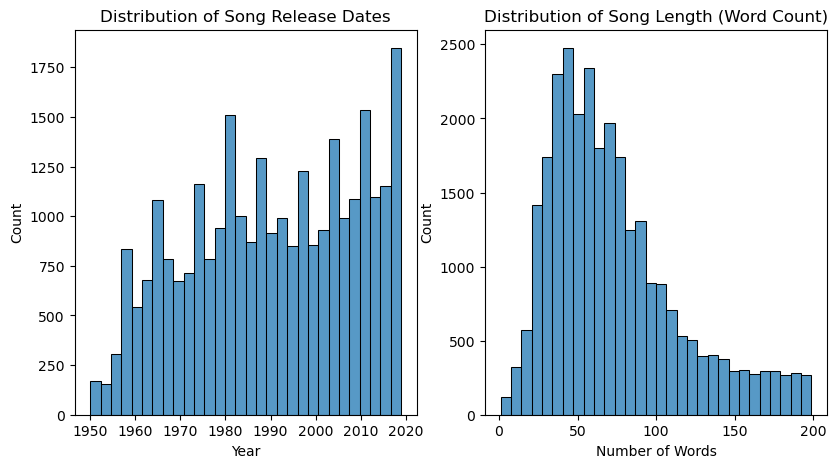

In [10]:
plt.figure(figsize=(15, 5))

# Distribution of release dates
plt.subplot(1, 3, 1)
sns.histplot(df['release_date'], bins=30, kde=False)
plt.title('Distribution of Song Release Dates')
plt.xlabel('Year')

# Distribution of song lengths
plt.subplot(1, 3, 2)
sns.histplot(df['len'], bins=30, kde=False)
plt.title('Distribution of Song Length (Word Count)')
plt.xlabel('Number of Words')

Modern songs and shorter songs dominate

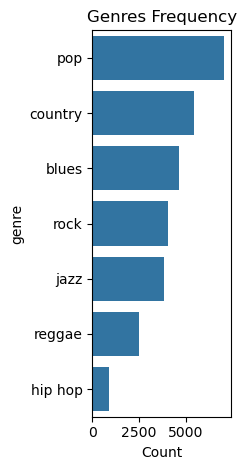

In [27]:
# Frequency of genres
plt.subplot(1, 3, 3)
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genres Frequency')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

Pop genre is the most popular, with hip hop as the least frequent.

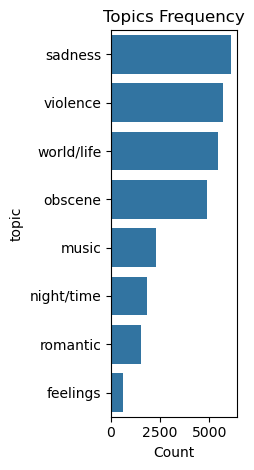

In [28]:
# Frequency of Topic
plt.subplot(1, 3, 3)
topic_counts = df['topic'].value_counts()
sns.barplot(x=topic_counts.values, y=topic_counts.index)
plt.title('Topics Frequency')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

Sadness, violence, and word/life are the top  3 topics, with feelings as the lowest.

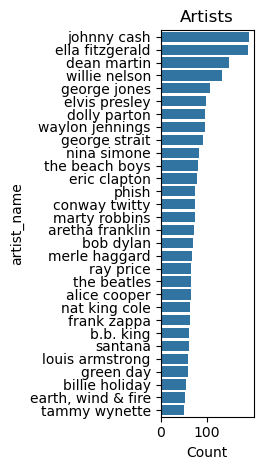

In [36]:
# Frequency of Artists
plt.subplot(1, 3, 3)
artist_counts = df['artist_name'].value_counts().head(30)
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Artists')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

Songs dominated by Johnny Cash and Ella Fitzgerald

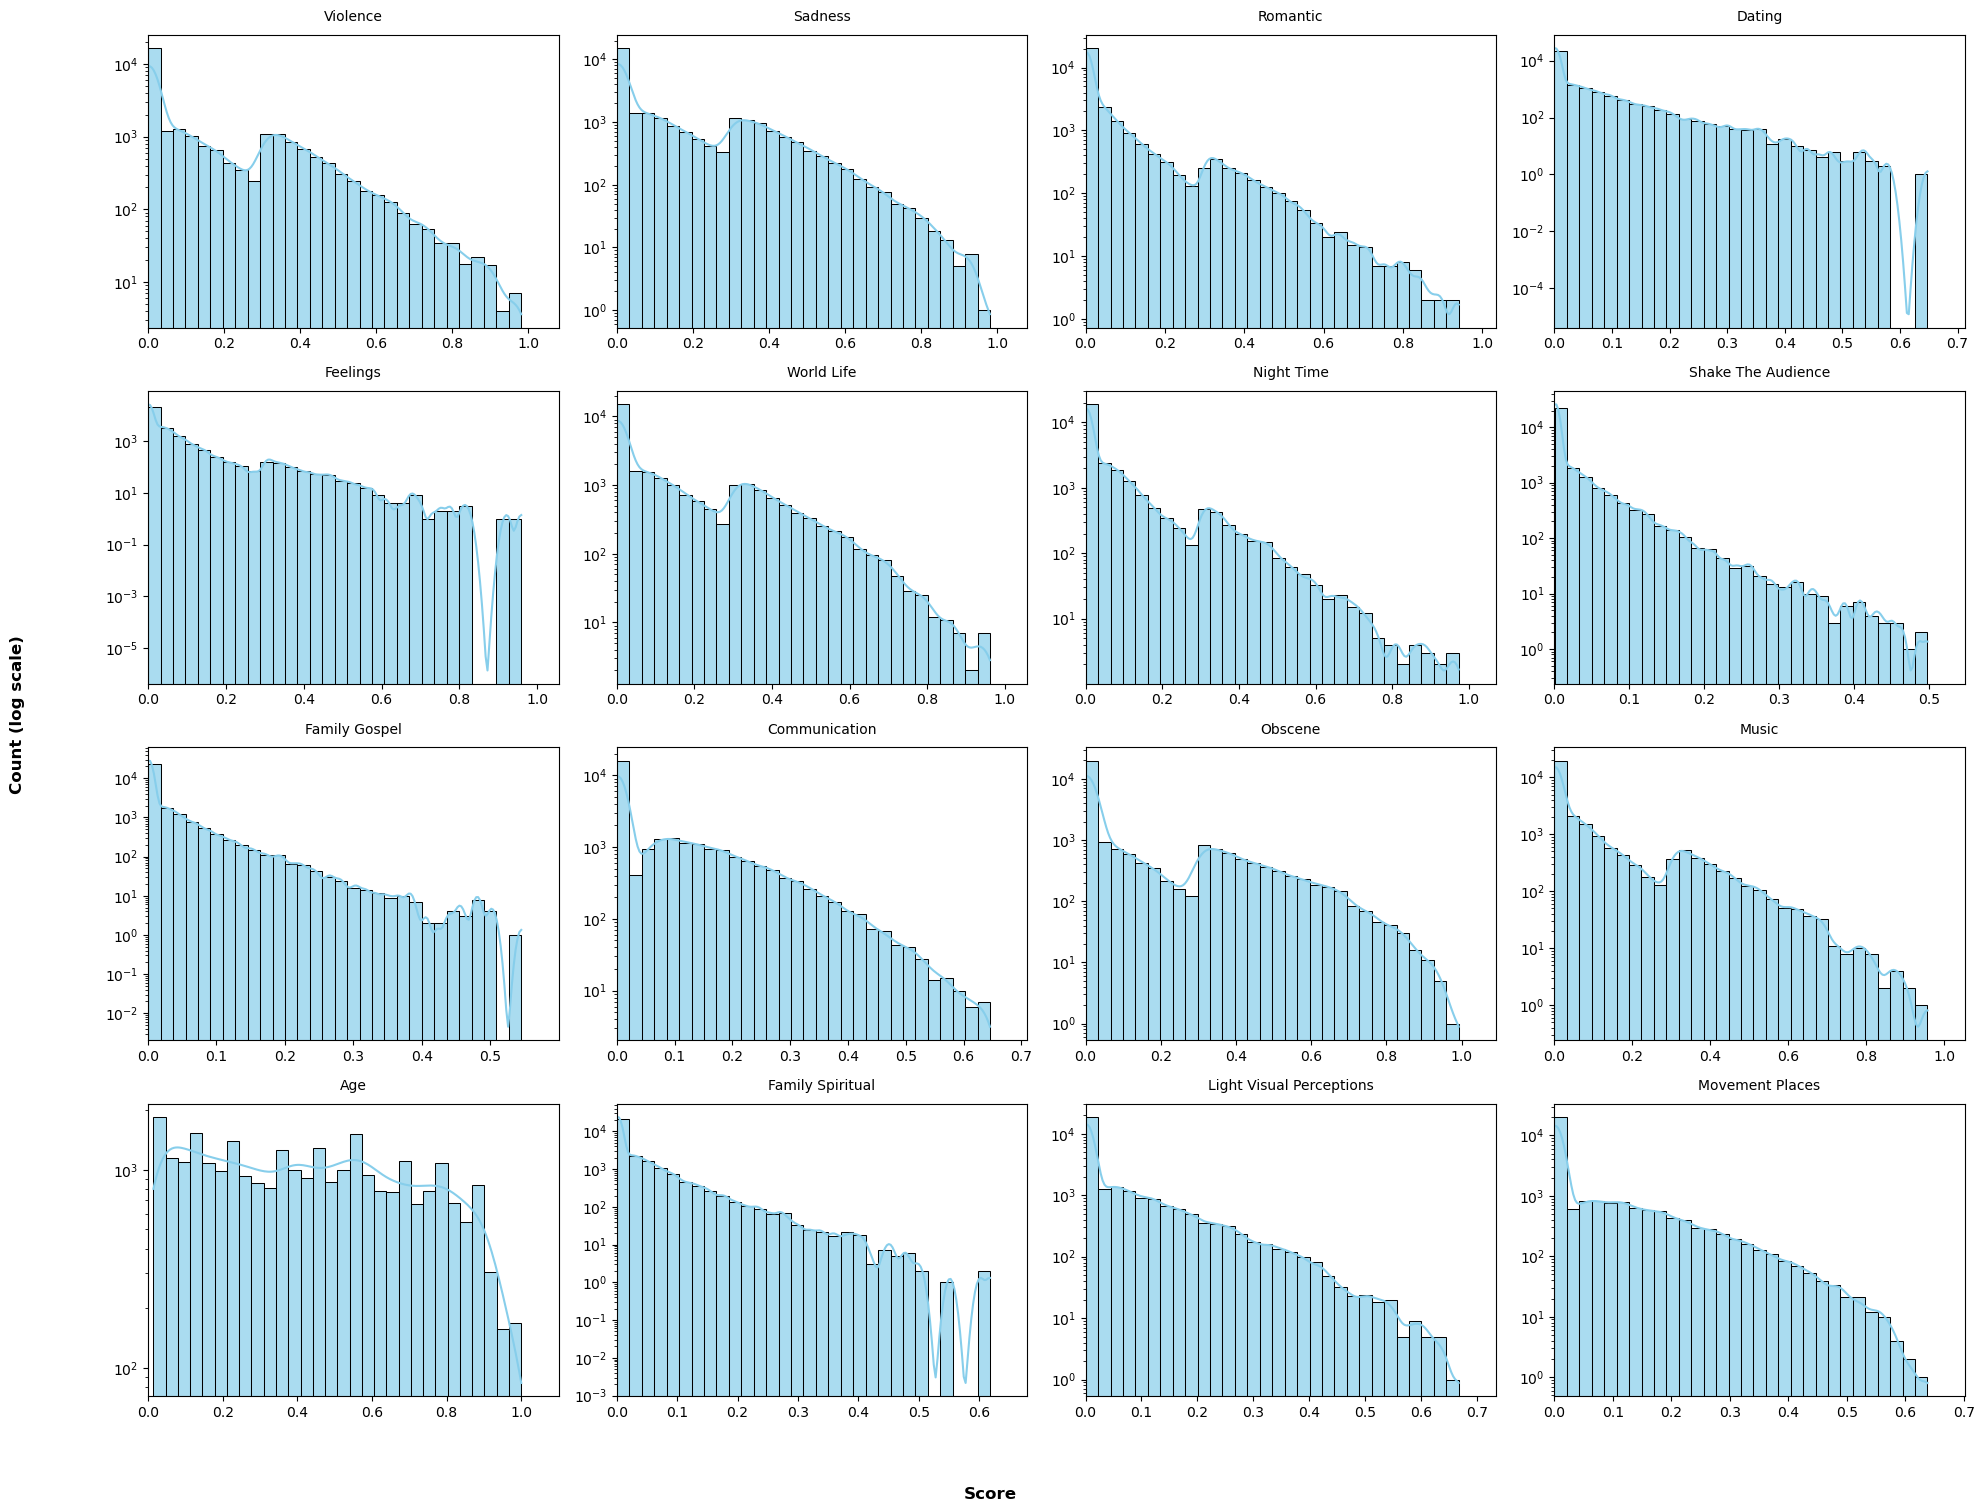

In [52]:
# Distribution of Scores
scores = ['violence', 'sadness', 'romantic', 'dating', 'feelings', 'world/life', 'night/time', 
          'shake the audience', 'family/gospel', 'communication', 'obscene', 'music', 
          'age', 'family/spiritual', 'light/visual perceptions', 'movement/places']

plt.figure(figsize=(20, 16)) 
for i, theme in enumerate(scores, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(df[theme], bins=30, kde=True, color='skyblue', alpha=0.7) 
    plt.title(theme.replace('/', ' ').title(), fontsize=10, pad=10)
    plt.xlabel('')  
    plt.ylabel('') 
    plt.yscale('log')  # Log scale for y-axis to handle skewness
    plt.xlim(0, df[theme].max() * 1.1)  # Adjust x-axis range

# Add shared labels
plt.figtext(0.5, 0.01, 'Score', ha='center', fontsize=12, weight='bold')
plt.figtext(0.01, 0.5, 'Count (log scale)', va='center', rotation='vertical', fontsize=12, weight='bold')

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

Most scores have right-skewed distrubution. Some scores are long-tailed (ex. 'Dating') due to small number of high scores. Scores like age show relatively uniform distrubution. 

**Bivariate Exploratory Analysis**

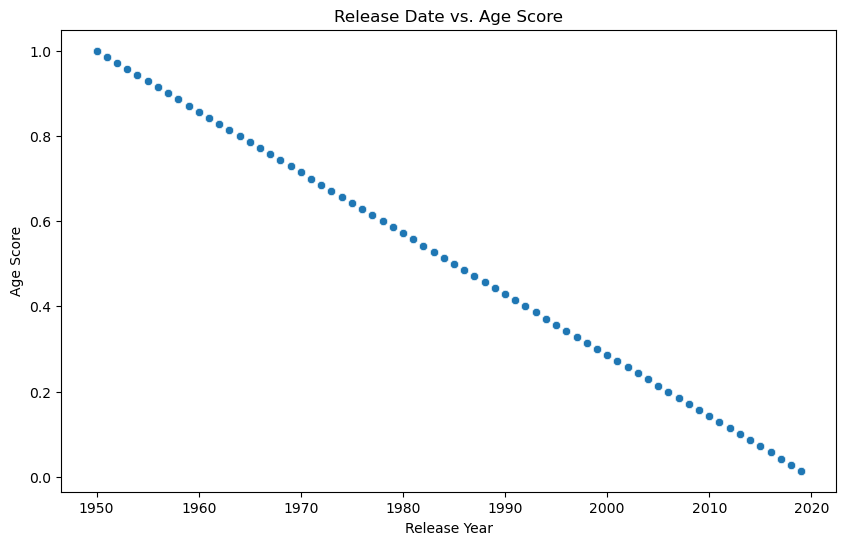

In [60]:
#Release Date vs. Age Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_date', y='age', data=df.sample(1000))
plt.title('Release Date vs. Age Score')
plt.xlabel('Release Year')
plt.ylabel('Age Score')
plt.show()

Strong negative correlation!

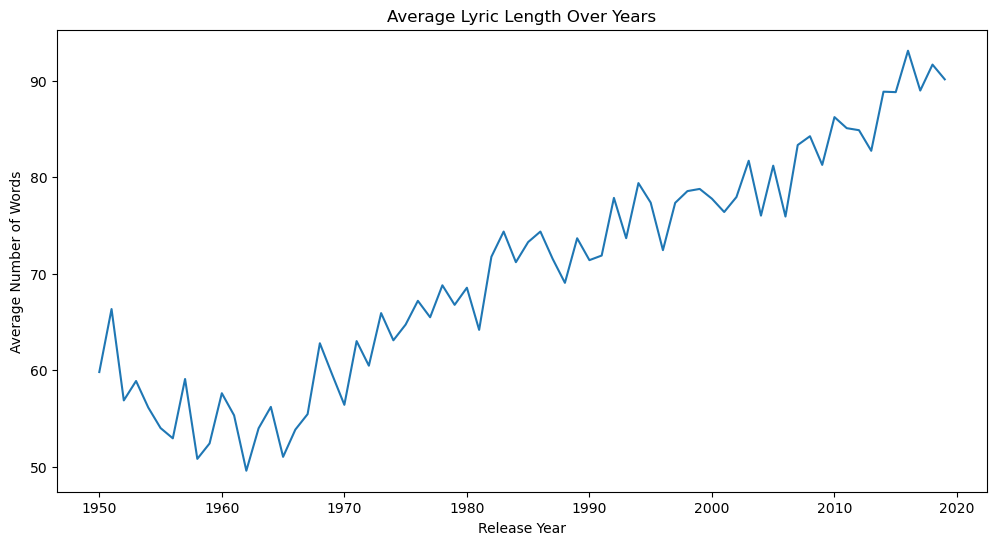

In [61]:
# Release Date vs. Lyric Length
plt.figure(figsize=(12, 6))
yearly_len = df.groupby('release_date')['len'].mean().reset_index()
sns.lineplot(x='release_date', y='len', data=yearly_len)
plt.title('Average Lyric Length Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Words')
plt.show()

Songs have increased in lyric content across the years

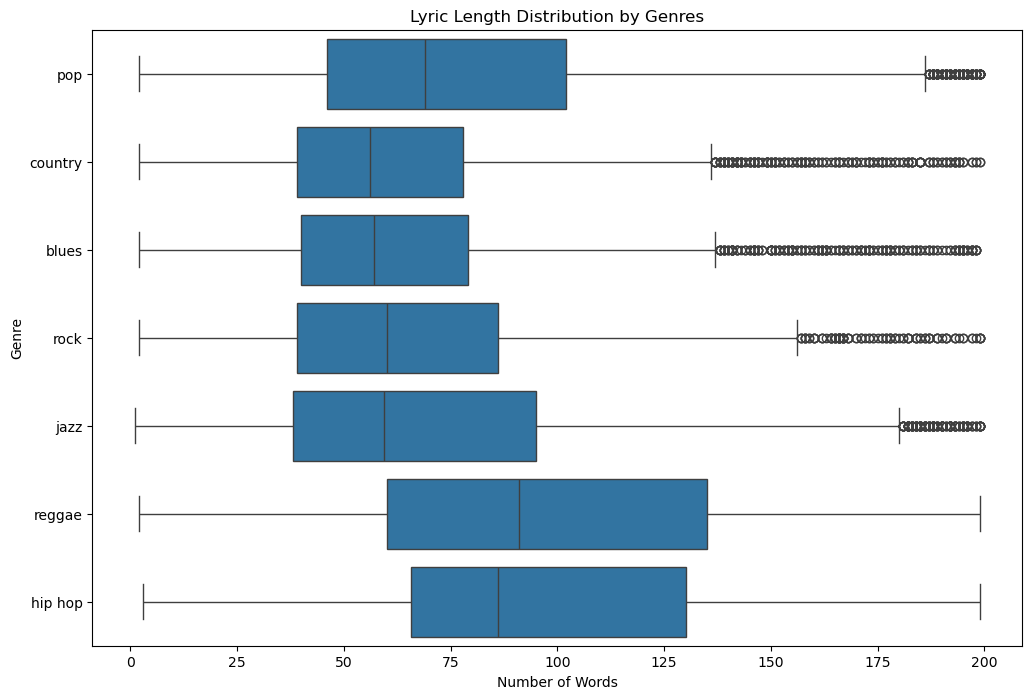

In [76]:
# Genre vs. Lyric Length
plt.figure(figsize=(12, 8))
top_n_genres = df['genre'].value_counts().nlargest(7).index
sns.boxplot(x='len', y='genre', data=df[df['genre'].isin(top_n_genres)], order=top_n_genres)
plt.title('Lyric Length Distribution by Genres')
plt.xlabel('Number of Words')
plt.ylabel('Genre')
plt.show()

Most of the genres have outliers when it comes lyric word length. Reggae has the highest median.

**Multivariate Exploratory Analysis**

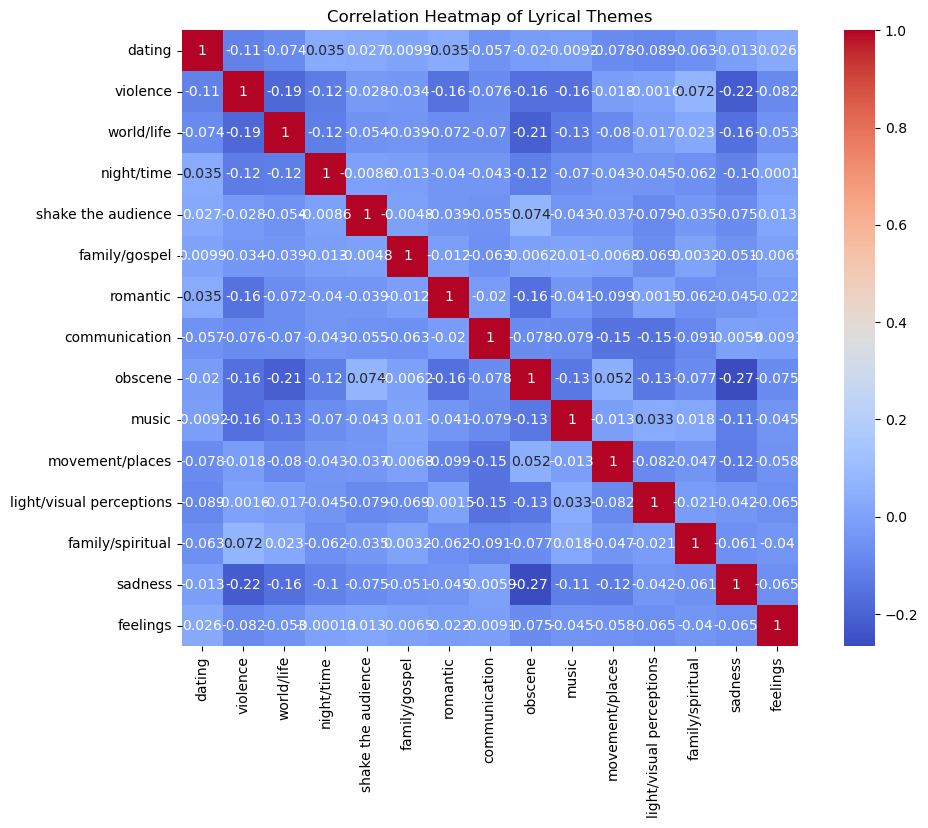

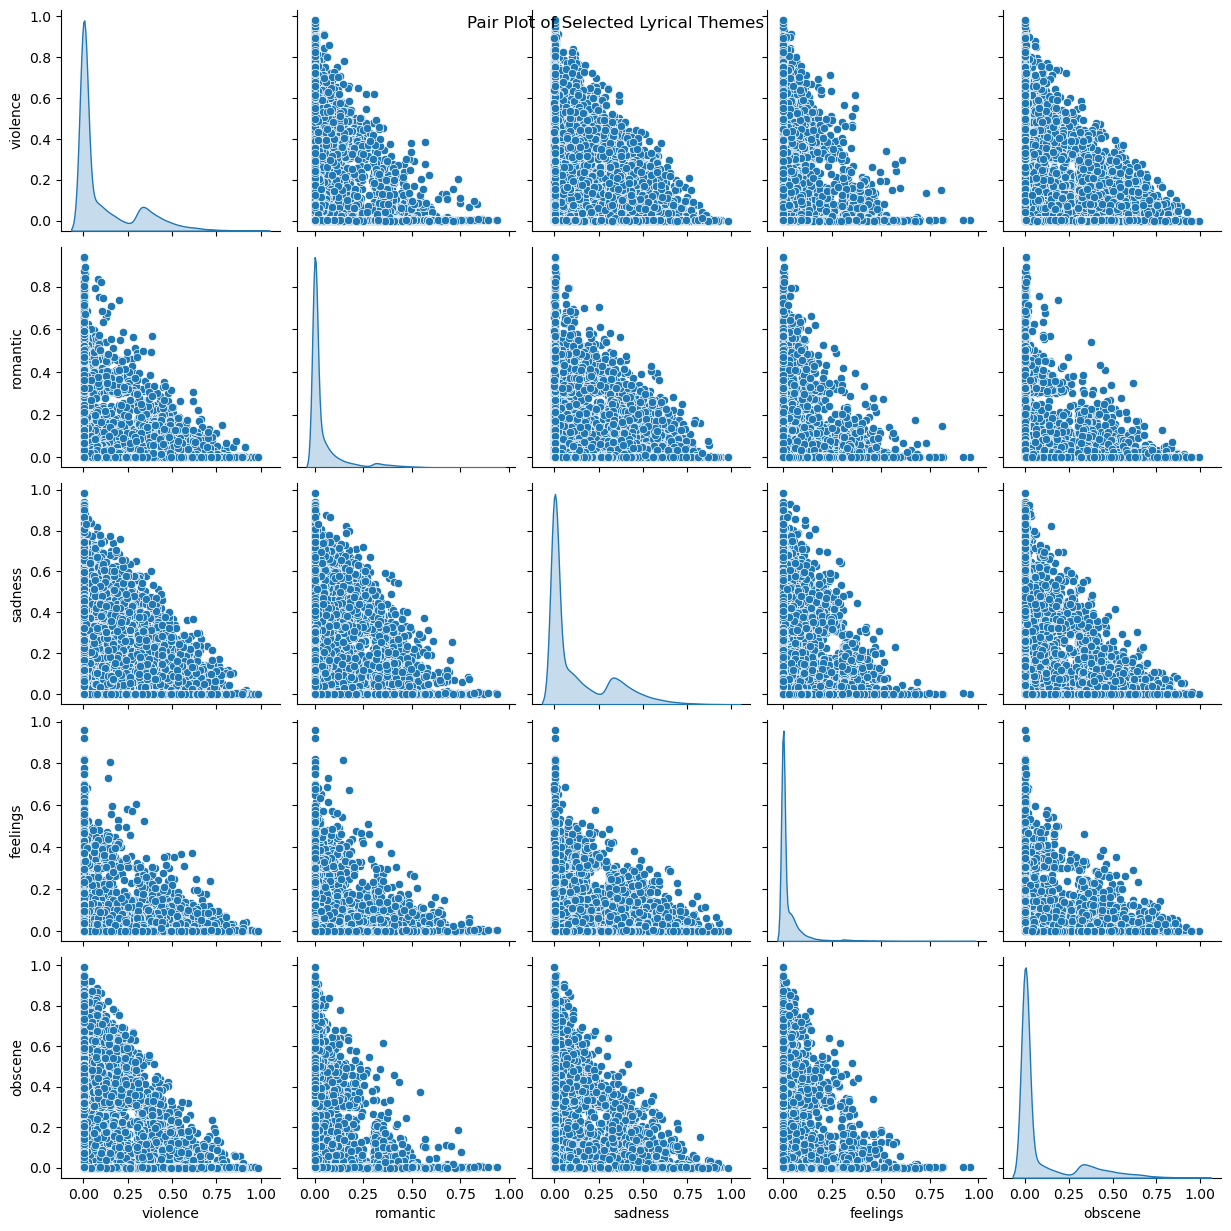

In [37]:
# Correlation Heatmap of Theme Scores
plt.figure(figsize=(12, 8))
theme_columns = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
                 'family/gospel', 'romantic', 'communication', 'obscene', 'music',
                 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings']
corr = df[theme_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Lyrical Themes')
plt.show()

# Pair Plot of Selected Themes
selected_themes = ['violence', 'romantic', 'sadness', 'feelings', 'obscene']
g = sns.pairplot(df[selected_themes], diag_kind='kde')
g.fig.suptitle('Pair Plot of Selected Lyrical Themes')
plt.show()